In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mca import MCA
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss, roc_curve, roc_auc_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from itertools import product

/home/joel/.local/lib/python3.9/site-packages/pandas/core/arrays/masked.py:59: UserWarning: Pandas requires version '1.3.2' or newer of 'bottleneck' (version '1.2.1' currently installed).
  from pandas.core import (


In [2]:
plt.style.use("ggplot")

## Import the data

In [3]:
IND_a= pd.read_csv("../Datasets/India_2021_access.csv")
IND_u= pd.read_csv('../Datasets/India_2021_usage.csv')
y= IND_a['fin34a'].copy()
IND_a= IND_a.drop('fin34a', axis=1)
IND_u= IND_u.drop('fin34a', axis=1)

In [4]:
y.value_counts()

0    2751
1     249
Name: fin34a, dtype: int64

In [5]:
IND_a= IND_a.drop(columns= IND_a.columns[:4])
IND_u= IND_u.drop(columns= IND_u.columns[:4])

## Implementing MCA

In [6]:
encoder = OneHotEncoder()

# Fitting and transforming the data
one_hot_encoded_IND_access = encoder.fit_transform(IND_a)

# Converting the sparse matrix to a dense numpy array and adding the weight column
final_data = pd.concat([pd.DataFrame(one_hot_encoded_IND_access.toarray())], axis=1)
# Printing the final one-hot encoded data
mca_IND_a = MCA(final_data, benzecri= False)

In [7]:
transformed_data= mca_IND_a.fs_r()

In [8]:
IND_a_index = pd.DataFrame()

# fill the dataframe with the values from the transformed data
for i in range(transformed_data.shape[1]):
    col_name = f"aPC{i+1}"
    IND_a_index[col_name] = transformed_data[:, i]

In [9]:
IND_a_index

,aPC1,aPC2,aPC3,aPC4,aPC5,aPC6,aPC7
0,-0.567314,-0.447776,0.067617,-0.209999,-0.609174,-0.384697,0.679147
1,-0.155963,0.539369,-0.090685,0.328047,0.638721,-0.053985,0.215181
2,-0.277087,0.292048,0.574905,0.065694,0.040816,0.306377,-0.021632
3,-0.257290,0.439983,0.100806,-0.184644,-0.525024,0.155632,-0.040867
4,-0.136166,0.687305,-0.564784,0.077709,0.072881,-0.204730,0.195946
...,...,...,...,...,...,...,...
2995,-0.259313,0.426326,-0.446383,-0.403698,0.024969,0.158173,-0.011786
2996,-0.573159,-0.219691,0.144052,-0.307616,-0.590037,-0.196450,-0.256542
2997,1.292090,-0.276265,0.046524,-0.208140,-0.012842,0.171018,-0.177518
2998,-0.640453,-0.793948,-1.011506,0.332279,-0.338505,0.844652,-0.153406


In [10]:
final_data = pd.get_dummies(IND_u)
# Printing the final one-hot encoded data
mca_IND_u = MCA(final_data, benzecri= False)
transformed_data= mca_IND_u.fs_r()
IND_u_index = pd.DataFrame()

# fill the dataframe with the values from the transformed data
for i in range(transformed_data.shape[1]):
    col_name = f"uPC{i+1}"
    IND_u_index[col_name] = transformed_data[:, i]
IND_u_index

,uPC1,uPC2,uPC3,uPC4,uPC5,uPC6,uPC7,uPC8,uPC9,uPC10,uPC11,uPC12,uPC13,uPC14,uPC15,uPC16,uPC17,uPC18,uPC19,uPC20
0,0.042528,0.240336,0.254181,-0.038489,-0.196509,0.045574,0.005665,0.016125,0.012658,-0.047017,0.174601,-0.114518,0.065321,0.057960,0.005551,-0.065330,0.004398,-0.298997,0.075667,-0.048837
1,0.091307,0.204128,0.131500,0.102875,-0.315894,-0.188368,0.028021,-0.110949,-0.014774,0.192471,-0.235388,0.050719,-0.175634,-0.056909,0.100151,-0.163268,-0.057487,0.186734,0.043206,-0.058345
2,0.143782,0.419535,0.070332,0.184830,-0.105397,0.047649,-0.279303,-0.043134,0.000239,0.034043,-0.086725,0.256200,0.069804,-0.017894,-0.061272,0.092392,0.142025,-0.043780,0.112082,-0.012559
3,0.250678,-0.163832,-0.056318,0.005550,-0.062916,0.125552,0.041440,-0.151596,0.026185,-0.096882,0.062291,0.004914,0.022470,0.237234,0.002952,-0.090792,0.061937,0.063157,-0.004681,0.205830
4,0.035596,0.395800,0.034476,-0.149748,0.007681,0.028565,0.210900,0.109298,0.025660,-0.078862,0.148929,0.035742,-0.042693,0.173326,0.455183,-0.075674,-0.292714,-0.110936,-0.026570,0.196227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,-0.182999,-0.089113,-0.243494,0.359579,0.032940,-0.173658,0.161931,0.365178,-0.095970,-0.138224,-0.139532,-0.072850,0.064891,-0.079812,0.125733,0.180767,0.401791,-0.368581,0.118837,-0.075754
2996,0.025811,0.286594,0.070260,0.057664,-0.058992,0.191764,-0.115601,-0.071085,-0.042188,0.070943,0.050210,-0.363797,0.196836,0.262714,-0.133645,-0.037959,-0.250476,0.165882,0.230606,-0.223618
2997,0.310368,-0.255452,0.236137,-0.121685,0.165071,-0.142420,0.054594,-0.022695,-0.007368,-0.003680,-0.030900,-0.022165,0.028446,0.009455,-0.013967,0.031354,-0.016203,-0.000463,-0.022718,0.000342
2998,-0.196018,0.206230,0.187372,0.237699,-0.191587,0.102032,0.326500,0.644944,0.832029,0.176438,-0.039754,0.228680,0.227248,-0.115777,-0.298335,-0.192377,-0.241902,-0.307355,0.063956,0.086268


In [11]:
X = pd.concat([IND_a_index, IND_u_index], axis=1)
X

,aPC1,aPC2,aPC3,aPC4,aPC5,aPC6,aPC7,uPC1,uPC2,uPC3,...,uPC11,uPC12,uPC13,uPC14,uPC15,uPC16,uPC17,uPC18,uPC19,uPC20
0,-0.567314,-0.447776,0.067617,-0.209999,-0.609174,-0.384697,0.679147,0.042528,0.240336,0.254181,...,0.174601,-0.114518,0.065321,0.057960,0.005551,-0.065330,0.004398,-0.298997,0.075667,-0.048837
1,-0.155963,0.539369,-0.090685,0.328047,0.638721,-0.053985,0.215181,0.091307,0.204128,0.131500,...,-0.235388,0.050719,-0.175634,-0.056909,0.100151,-0.163268,-0.057487,0.186734,0.043206,-0.058345
2,-0.277087,0.292048,0.574905,0.065694,0.040816,0.306377,-0.021632,0.143782,0.419535,0.070332,...,-0.086725,0.256200,0.069804,-0.017894,-0.061272,0.092392,0.142025,-0.043780,0.112082,-0.012559
3,-0.257290,0.439983,0.100806,-0.184644,-0.525024,0.155632,-0.040867,0.250678,-0.163832,-0.056318,...,0.062291,0.004914,0.022470,0.237234,0.002952,-0.090792,0.061937,0.063157,-0.004681,0.205830
4,-0.136166,0.687305,-0.564784,0.077709,0.072881,-0.204730,0.195946,0.035596,0.395800,0.034476,...,0.148929,0.035742,-0.042693,0.173326,0.455183,-0.075674,-0.292714,-0.110936,-0.026570,0.196227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,-0.259313,0.426326,-0.446383,-0.403698,0.024969,0.158173,-0.011786,-0.182999,-0.089113,-0.243494,...,-0.139532,-0.072850,0.064891,-0.079812,0.125733,0.180767,0.401791,-0.368581,0.118837,-0.075754
2996,-0.573159,-0.219691,0.144052,-0.307616,-0.590037,-0.196450,-0.256542,0.025811,0.286594,0.070260,...,0.050210,-0.363797,0.196836,0.262714,-0.133645,-0.037959,-0.250476,0.165882,0.230606,-0.223618
2997,1.292090,-0.276265,0.046524,-0.208140,-0.012842,0.171018,-0.177518,0.310368,-0.255452,0.236137,...,-0.030900,-0.022165,0.028446,0.009455,-0.013967,0.031354,-0.016203,-0.000463,-0.022718,0.000342
2998,-0.640453,-0.793948,-1.011506,0.332279,-0.338505,0.844652,-0.153406,-0.196018,0.206230,0.187372,...,-0.039754,0.228680,0.227248,-0.115777,-0.298335,-0.192377,-0.241902,-0.307355,0.063956,0.086268


## Logistic regression

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

In [13]:
lr = LogisticRegression(solver='newton-cg')

#Setting the range for class weights
weights= [.01* i for i in range(0, 101)]
weights= list(product(weights, weights))

#Creating a dictionary grid for grid search
param_grid = {'class_weight': [{0: x[0], 1:x[1]} for x in weights], 
              'C': [0.01*i for i in range(90,95)]}

#Fitting grid search to the train data with 5 folds
grid_search = GridSearchCV(estimator= lr, 
                          param_grid= param_grid,
                          cv=StratifiedKFold(), 
                          n_jobs=-1, 
                          scoring='f1', 
                          verbose=2).fit(X_train, y_train)

Fitting 5 folds for each of 51005 candidates, totalling 255025 fits


In [14]:
print('Best parameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

Best parameters: {'C': 0.9, 'class_weight': {0: 0.21, 1: 0.7000000000000001}}
Best score: 0.7193150645540334


In [15]:
best_lr_model = LogisticRegression(**grid_search.best_params_)
best_lr_model.fit(X, y)

proba = best_lr_model.predict_proba(X_test)

auc1 = roc_auc_score(y_test, proba[:,1], multi_class='auto')
print('AUC:', auc1)

# Calculate precision, recall, and F1-score
target_names = ["0", "1"]
y_pred = best_lr_model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=target_names))

AUC: 0.9781063609414622
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       549
           1       0.64      0.82      0.72        51

    accuracy                           0.94       600
   macro avg       0.81      0.89      0.84       600
weighted avg       0.95      0.94      0.95       600



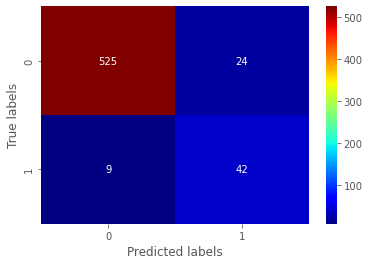

In [16]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap="jet")

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [17]:
y_=proba[:,1]
y_.shape

(600,)

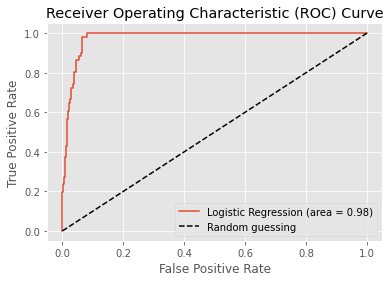

In [18]:
fpr1, tpr1, thresholds = roc_curve(y_test, y_)

# plot the ROC curve
plt.plot(fpr1, tpr1, label='Logistic Regression (area = %0.2f)' % auc1)
plt.plot([0, 1], [0, 1], linestyle='--', color= "k", label='Random guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [19]:
accuracy_score(y_test, y_pred)

0.945

In [20]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt'],
    'class_weight': [{0: x[0], 1:x[1]} for x in weights
}
rf = RandomForestClassifier(random_state= 42)

In [21]:
grid_search = GridSearchCV(estimator=rf, 
                           param_grid=param_grid, 
                           cv= StratifiedKFold(), 
                           scoring='f1', 
                           n_jobs=-1)
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
proba= best_rf.predict_proba(X_test)
print(f'Best hyperparameters: {grid_search.best_params_}')



/home/joel/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best hyperparameters: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [22]:
auc2 = roc_auc_score(y_test, proba[:,1], multi_class='auto')
print('AUC:', auc2)
target_names = ["0", "1"]
print(classification_report(y_test, y_pred, target_names=target_names))

AUC: 0.943426550948248
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       549
           1       0.67      0.27      0.39        51

    accuracy                           0.93       600
   macro avg       0.80      0.63      0.67       600
weighted avg       0.91      0.93      0.91       600



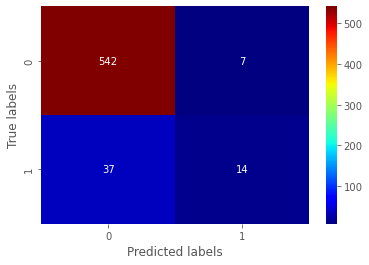

In [23]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap="jet")

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

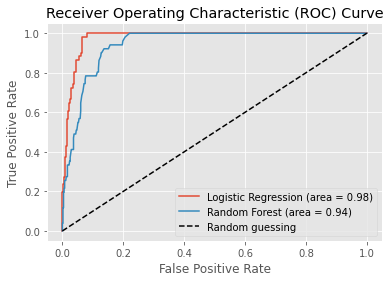

In [24]:
y_=proba[:,1]
fpr2, tpr2, thresholds = roc_curve(y_test, y_)

# plot the ROC curve
plt.plot(fpr1, tpr1, label='Logistic Regression (area = %0.2f)' % auc1)
plt.plot(fpr2, tpr2, label='Random Forest (area = %0.2f)' % auc2)
plt.plot([0, 1], [0, 1], linestyle='--', color= "k", label='Random guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()